In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Khai báo thư viện

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# Load dữ liệu từ MNIST

In [ ]:
# x: images, y:labels
(train_x, train_y), (test_x, test_y) = mnist.load_data()
# train_images là dữ liệu đã train

print(train_x.shape)
# 60.000 bức ảnh với kích thước 28 * 28 pixel
print(train_y.shape)

print(test_x.shape)
# 10.000 bức ảnh với kích thước 28*28 pixel
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Tập kiểm thử - Validation

In [ ]:
# lấy một phần con của dữ liệu huấn luyện gốc (train_x là dữ liệu đầu vào và train_y là nhãn tương ứng)  để kiểm thử
val_x, val_y = train_x[50000:60000, :], train_y[50000:60000] # từ hàng 50000 đến 59999
train_x, train_y = train_x[:50000, :], train_y[:50000] # từ đầu đến hàng 49999
print(val_x.shape)
print(val_y.shape)
print(train_x.shape)
print(train_y.shape)

(10000, 28, 28)
(10000,)
(50000, 28, 28)
(50000,)


# Chuẩn hóa dữ liệu

Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu.

In [ ]:
so_kenh_mau = 1 # Điều này có nghĩa là hình ảnh sẽ được coi là ảnh grayscale, có một kênh màu duy nhất.
cao_pixel = 28
rong_pixel = 28

# train_images.shape là một tuple chứa thông tin về kích thước của X_train. Trong trường hợp này, .shape[0] trả về số lượng mẫu.
# In ra số lượng mẫu hình ảnh trong tập huấn luyện
print(train_x.shape[0])

# reshape tập train và test, dữ liệu hình ảnh sẽ được biểu diễn dưới dạng một tensor 4D
# Chuyển đổi kiểu dữ liệu của mỗi phần tử trong tensor thành kiểu dữ liệu float32
# Sau đó, dữ liệu được chuẩn hóa bằng cách chia cho 255.0 để đưa giá trị pixel về khoảng [0, 1]
train_x = train_x.reshape((train_x.shape[0], cao_pixel, rong_pixel, so_kenh_mau)).astype('float32') / 255.0
val_x = val_x.reshape((val_x.shape[0], cao_pixel, rong_pixel, so_kenh_mau)).astype('float32') / 255.0
test_x = test_x.reshape((test_x.shape[0], cao_pixel, rong_pixel, so_kenh_mau)).astype('float32') / 255.0

print("Shape of train_x: {}".format(train_x.shape))
print("Shape of val_x: {}".format(val_x.shape))
print("Shape of test_x: {}".format(test_x.shape))

50000
Shape of train_x: (50000, 28, 28, 1)
Shape of val_x: (10000, 28, 28, 1)
Shape of test_x: (10000, 28, 28, 1)


Áp dụng thuật toán One hot encoding label (Y)

In [ ]:
# Thực hiện one-hot encoding cho nhãn trong tập train_labels và test_labels với 10 là số lượng lớp.
# One-hot encoding là một quá trình biến đổi nhãn thành vectơ có độ dài bằng số lượng lớp,
# trong đó chỉ có một phần tử có giá trị 1, và phần còn lại có giá trị 0

train_Y = to_categorical(train_y, 10)
val_Y = to_categorical(val_y, 10)
test_Y = to_categorical(test_y, 10)

print('Dữ liệu labels ban đầu: ', train_y[100])
print('Dữ liệu label sau one-hot encoding: ',train_Y[100])

Dữ liệu labels ban đầu:  5
Dữ liệu label sau one-hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Xây dựng mô hình CNN

Xây dựng mô hình

In [ ]:
# Khởi tạo mô hình tuần tự (sequential model) - Mô hình tuần tự là một chồng các lớp tuyến tính trong Keras
model = models.Sequential()

#layer 1
# Lớp Convolutional đầu tiên với 32 bộ lọc kích thước (3, 3) và hàm kích hoạt ReLU (Rectified Linear Unit) tính phi tuyến tính
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Lớp MaxPooling để giảm kích thước ảnh
model.add(layers.MaxPooling2D((2, 2)))

#layer 2
# Lớp Convolutional thứ hai với 64 bộ lọc kích thước (3, 3) và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Lớp MaxPooling để giảm kích thước ảnh
model.add(layers.MaxPooling2D((2, 2)))

#layer 3
# Lớp Convolutional thứ ba với 64 bộ lọc kích thước (3, 3) và hàm kích hoạt ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#FCN layer
# Lớp Flatten để chuyển từ tensor 3D thành vector 1D
model.add(layers.Flatten())
# Lớp fully connected (Dense) với 64 đơn vị và hàm kích hoạt ReLU
model.add(layers.Dense(64, activation='relu'))
# Lớp fully connected (Dense) với 10 đơn vị (số lượng classes) và hàm kích hoạt softmax (Output Layer)
model.add(layers.Dense(10, activation='softmax'))

#tóm tắt mô hình
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile model và thực hiện train model với data

In [ ]:
# Sử dụng optimizer Adam, hàm loss là categorical crossentropy cho bài toán phân loại nhiều classes
EPOCHS = 10 # số lần lặp trên toàn bộ dữ liệu
BATCH_SIZE = 32 # số mẫu được sử dụng mỗi lần

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình trên dữ liệu huấn luyện với số epoch là 20 và batch size là 32
history = model.fit(train_x, train_Y,validation_data = (val_x, val_Y), epochs = EPOCHS, batch_size = BATCH_SIZE)



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.8862 - loss: 0.3690 - val_accuracy: 0.9852 - val_loss: 0.0565
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9843 - loss: 0.0515 - val_accuracy: 0.9859 - val_loss: 0.0489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9884 - loss: 0.0362 - val_accuracy: 0.9871 - val_loss: 0.0497
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9905 - val_loss: 0.0354
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9909 - val_loss: 0.0350
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.9945 - loss: 0.0158 - val_accuracy: 0.9913 - val_loss: 0.0363
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9859 - val_loss: 0.0524
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.9970 -

Đánh giá mô hình

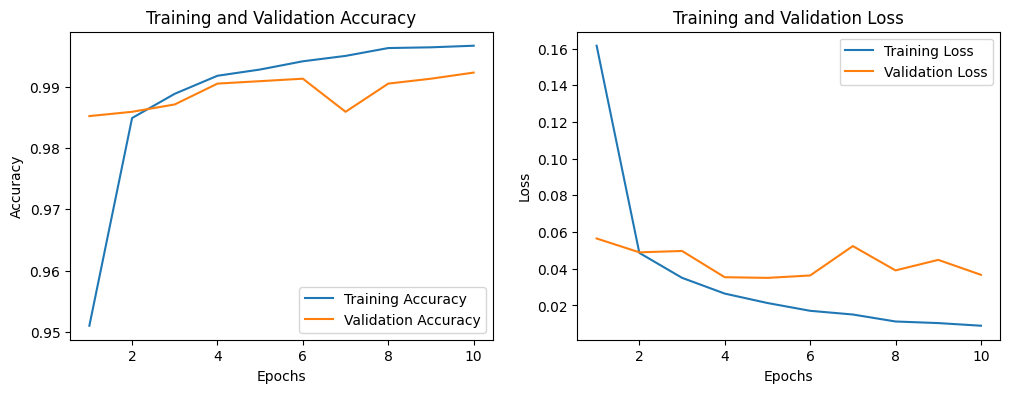

In [ ]:
# Lấy thông tin về độ chính xác và độ mất mát từ quá trình huấn luyện
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Vẽ đồ thị độ chính xác qua các epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(acc) + 1), acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ đồ thị độ mất mát qua các epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị đồ thị
plt.show()


**Lưu model**

In [ ]:
# save a trained neural network model to a file
#model.save('reco_digit.keras')
model.save('/content/drive/MyDrive/HHTQD/Chương trình/mnist_cnn_model.keras')

#Dự đoán kết quả với tệp Test của MNIST.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[4.9252943e-21 5.0466430e-18 4.9478743e-13 8.5586724e-13 9.0893643e-20
  7.7889025e-15 2.0556350e-15 3.0650785e-19 1.0000000e+00 1.6535956e-16]]


Số dự đoán là: 8


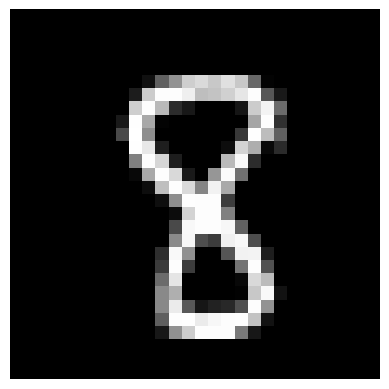

In [ ]:
example = val_x[1]

NUMBER_OF_IMAGES = 1

prediction = model.predict(example.reshape(NUMBER_OF_IMAGES, 28, 28, 1))
print(prediction)

print("\n\nSố dự đoán là: {}".format(np.argmax(prediction)))
# np.argmax is used to find the index of the highest predicted value in the prediction array
plt.imshow(example.reshape(28, 28),
           cmap="gray")
plt.axis('off')
plt.show()

Dưới đây là dự đoán bởi mô hình huấn luyện ở trên với 25 ảnh đầu tiên trong tập val_x. Nhãn dự đoán đúng sẽ có màu xanh nhãn dự đoán sai sẽ có màu đỏ

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


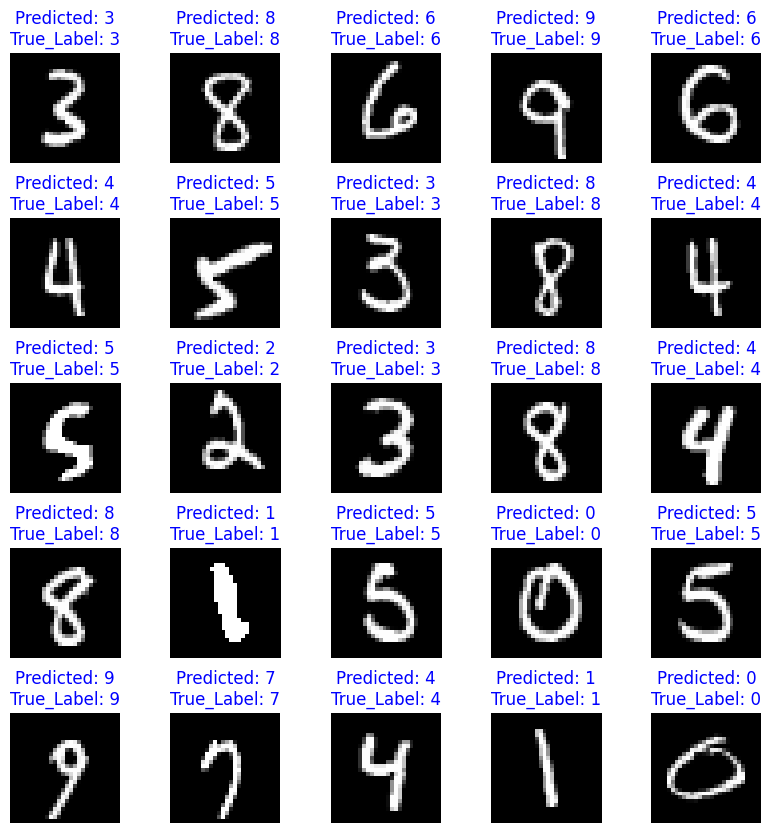

In [ ]:
NUMBER_OF_IMAGES = 25
plt.figure(figsize=(10, 10))

# Lấy 25 ảnh từ tập kiểm thử (ví dụ: 25 ảnh đầu tiên)
examples = val_x[:NUMBER_OF_IMAGES]

# Dự đoán cho từng ảnh
predictions = model.predict(examples)

# Hiển thị kết quả dự đoán cho từng ảnh
for i in range(NUMBER_OF_IMAGES):
    plt.subplot(5, 5, i + 1)
    plt.subplots_adjust(hspace=0.5)

    image = examples[i].reshape(28, 28)
    plt.imshow(image, cmap="gray")  # Thêm cmap="gray" để đảm bảo ảnh hiển thị ở định dạng xám
    plt.axis('off')

    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(val_Y[i])

    # Sử dụng color để đánh dấu dự đoán đúng hoặc sai
    color = "blue" if predicted_label == true_label else "red"
    plt.title(f'Predicted: {predicted_label}\nTrue_Label: {true_label}', color=color)

plt.show()



# Thực hiện nhận dạng các chữ số viết tay từ file image

Chọn ảnh cần nhận dạng

Saving Eight.png to Eight.png


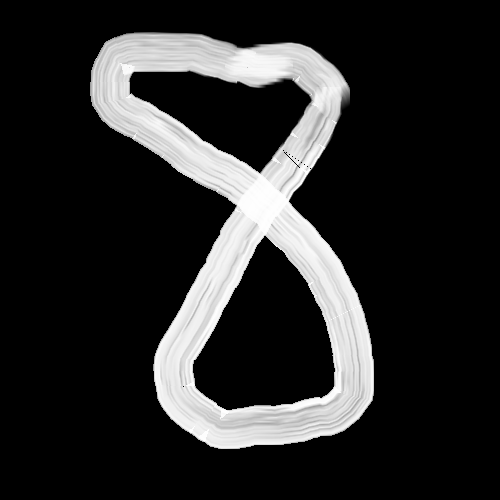

In [2]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))

# Hình ảnh được tải lên với kích thước ban đầu
from IPython.display import Image
Image(filename) #show image with its original size

Chuyển đổi hình ảnh về kích thước chuẩn

In [3]:
# make a prediction for a new image.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
#from keras.models import load_model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/HHTQD/Chương trình/mnist_cnn_model.keras')
# Tải hình ảnh
img = load_img(filename, color_mode="grayscale", target_size=(28, 28,1))
# Chuyển đổi thành mảng
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(28, 28, 1)
# Chuẩn bị dữ liệu pixel cho hình ảnh
img = img.astype('float32')
img = img / 255.0
# Chuyển đồi hình ảnh về dạng
type(img)
tf.shape(img)
print(tf.shape(img))

tf.Tensor([28 28  1], shape=(3,), dtype=int32)


Hình ảnh sau khi reshape

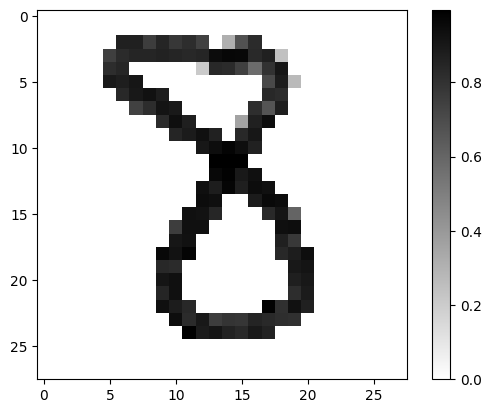

In [4]:
# Take 1 image and reshaping
x = np.array([img])
image = x
image = image.reshape(28, 28)

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Đưa ra dự đoán

In [5]:
predict = model.predict(x)
label = np.argmax(predict,axis = 1)
print(f"Số nhận dạng được: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
Số nhận dạng được: [8]


Biểu đồ hình cột thể hiện sự dự đoán sau khi nhận dạng

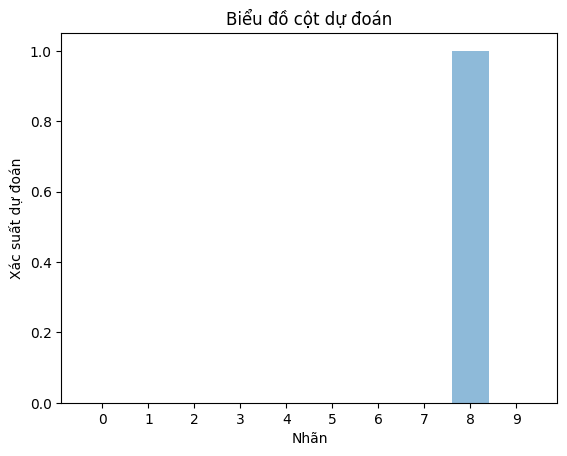

In [6]:
# có 10 nhãn (0 đến 9)
num_labels = 10
# Tạo danh sách các nhãn từ 0 đến 9
labels_list = list(range(num_labels))

# Vẽ biểu đồ cột
plt.bar(labels_list, predict[0], align='center', alpha=0.5)
plt.xlabel('Nhãn')
plt.ylabel('Xác suất dự đoán')
plt.title('Biểu đồ cột dự đoán')
plt.xticks(labels_list)
plt.show()
